In [3]:
import requests
import csv
# API URL
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send GET request to the API and retrieve the data
response = requests.get(url)
data = response.json()

# Extract information from the data
show_id = data['id']
show_name = data['name']

episodes = data['_embedded']['episodes']
episode_data = []

# Iterate over each episode and extract the required attributes
for episode in episodes:
    episode_id = episode['id']
    episode_url = episode['url']
    episode_name = episode['name']
    season_number = episode['season']
    episode_number = episode['number']
    episode_type = episode['type']
    airdate = episode['airdate']
    airtime = episode['airtime']
    runtime = episode['runtime']
    average_rating = episode['rating']['average']
    summary = episode['summary']
    medium_image = episode['image']['medium']
    original_image = episode['image']['original']

    # Clean the summary by removing HTML tags
    clean_summary = summary.strip('<p>').strip('</p>')

    # Create a dictionary of episode data
    episode_info = {
        'id': episode_id,
        'url': episode_url,
        'name': episode_name,
        'season': season_number,
        'number': episode_number,
        'type': episode_type,
        'airdate': airdate,
        'airtime': airtime,
        'runtime': runtime,
        'average_rating': average_rating,
        'summary': clean_summary,
        'medium_image': medium_image,
        'original_image': original_image
    }

    episode_data.append(episode_info)

csv_file = 'episode_data.csv'

# Write the episode data to the CSV file
with open(csv_file, 'w', newline='', encoding='utf-8') as file:
  writer = csv.DictWriter(file, fieldnames=episode_data[0].keys())
  writer.writeheader()
  writer.writerows(episode_data)



In [9]:
import pandas as pd
df =pd.read_csv('/content/episode_data.csv')
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image,original_image
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: average_rating, dtype: float64


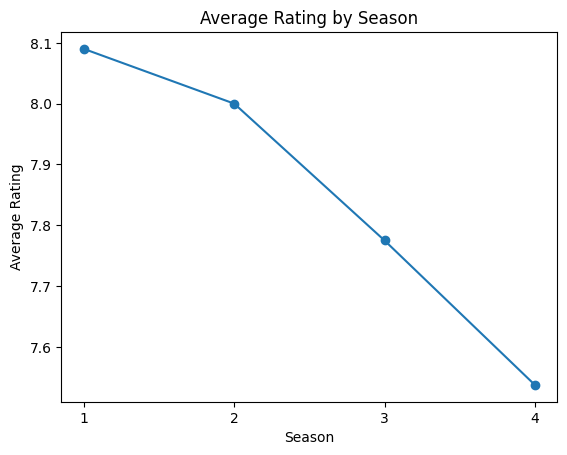

In [8]:
# Get all the overall ratings for each season and using plots compare the ratings for all the
import matplotlib.pyplot as plt 
season_ratings =df.groupby('season')['average_rating'].mean()
print(season_ratings)

plt.plot(season_ratings.index, season_ratings.values, marker="o")
plt.xticks(range(1, len(season_ratings)+1))
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Rating by Season')
plt.show()

In [11]:
# Get all the episode names, whose average rating is more than 8 for every season
Above_8_rated_episodes = df[df['average_rating']>8]
Above_8_rated_episodes[['name','average_rating']]


,name,average_rating
6,Trompe L'Oeil,8.6
8,The Well-Tempered Clavier,8.5
9,The Bicameral Mind,8.7
17,Kiksuya,8.7
18,Vanishing Point,8.4
19,The Passenger,8.5


In [13]:
# Get all the episode names that aired before May 2019
episode_names_aired_before_may2019 = df[df['airdate']<'2019-05-01']
episode_names_aired_before_may2019[['name','airdate']]

,name,airdate
0,The Original,2016-10-02
1,Chestnut,2016-10-09
2,The Stray,2016-10-16
3,Dissonance Theory,2016-10-23
4,Contrapasso,2016-10-30
5,The Adversary,2016-11-06
6,Trompe L'Oeil,2016-11-13
7,Trace Decay,2016-11-20
8,The Well-Tempered Clavier,2016-11-27
9,The Bicameral Mind,2016-12-04


In [19]:
# Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = df.groupby('season')['average_rating'].idxmax()
lowest_rated_episodes = df.groupby('season')['average_rating'].idxmin()

highest_rated_names = df.loc[highest_rated_episodes]['name']
lowest_rated_names = df.loc[lowest_rated_episodes]['name']
print('Highest_rated_name: \n', highest_rated_names) 
print('Lowest_rated_name: \n',lowest_rated_names)

Highest_rated_name: 
 9     The Bicameral Mind
17               Kiksuya
20          Parce Domine
32              Zhuangzi
Name: name, dtype: object
Lowest_rated_name: 
 2        The Stray
14    Akane No Mai
25     Decoherence
28    The Auguries
Name: name, dtype: object


In [22]:
# Get the summary for the most popular (ratings) episode in every season:
df.loc[highest_rated_episodes][['name','summary']]

,name,summary
9,The Bicameral Mind,Delores finds out the truth about William's fa...
17,Kiksuya,Another of Westworld's Host revolutionaries is...
20,Parce Domine,"If you're stuck in a loop, try walking in a st..."
32,Zhuangzi,God is bored.
